# Project Statistical Methods for Decision Making: FoodHub Data Analysis

**Marks: 60 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Read the data
df = pd.read_csv('foodhub_order.csv') ## Fill the blank to read the data
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### Observations:
The DataFrame has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? [0.5 mark]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### Observation
There is 4 int64 datatype are present, 4 object datatypes are present and also 1 float64 are present in the DataFrame.  

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.  [1 Mark]

In [6]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### Observation
There is no missing value or null value present in the DataFrame. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Get the summary statistics of the numerical data
df.describe().T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### Observation
1- The average cost of an order is ~16.5, the average preparation time for an ordered food is 27.4 min, and the average delivery time for an order is 24.2 min.

2- In these three variables, none of them seem to have outliers.

3- Cost of the Order has slightly right skewed.

4- The minimum, average, and maximum times it takes for food to be prepared are 20 min, 27.4 min, and 35 min, respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
df['rating'].value_counts() ## Complete the code 

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Observation
Total 736 orders are not rated in the DataFrame.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [8 marks]

#### Order ID

In [9]:
# check unique order ID
df['order_id'].nunique()  

1898

### Observation
There are 1898 order id in the DataFrame.

#### Customer ID

In [10]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

### Observation
There are 1200 customer id present in the DataFrame.

#### Restaurant name

In [11]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

### Observation
There are 178 unique restaurant name present in the DataFrame.

#### Cuisine type

In [12]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

### Observation
There are 14 unique cuisine type present in the DataFrame.

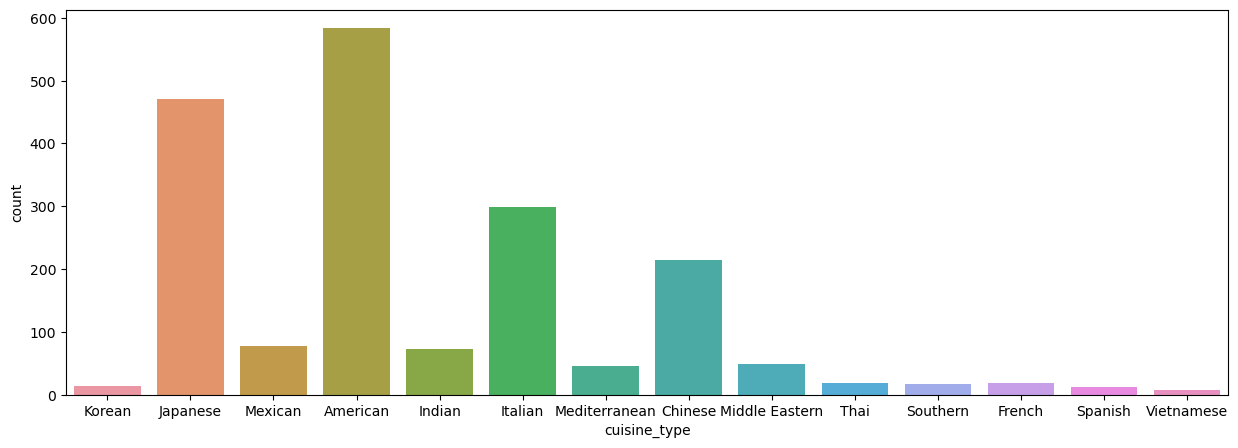

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type');## Create a countplot for cuisine type.

### Observation
From the above plot the most popular cuisine is found to be American. The least popular cuisine is Vietnamese.

#### Cost of the order

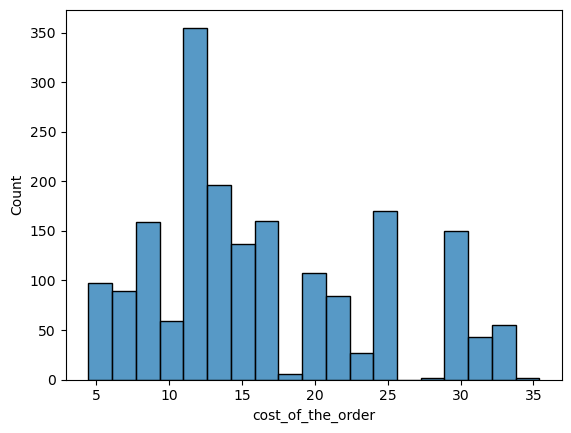

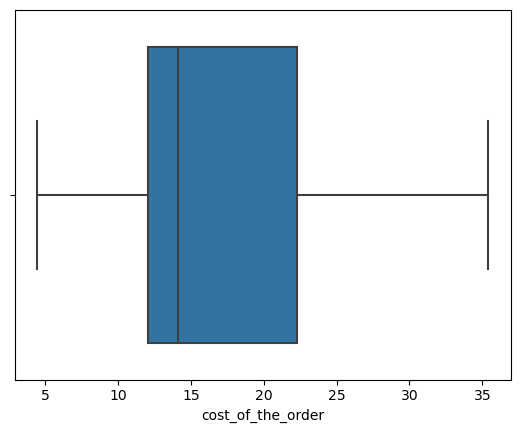

In [14]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Observation
1- The distribution is slightly right-skewed which indicates the mean is greater then the median.

2- The cost of an order ranges from almost 4.5 to 35.4, while the median cost is 14.1.

3- A large portion of order costs are between 10 and 17 approximately.

#### Day of the week

In [15]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

#### Observation
There are 2 unique values are present in the day of the week column 'Weekday' and 'Weekend'.

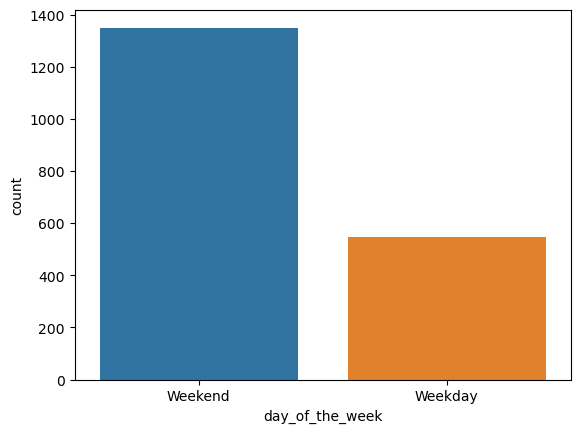

In [16]:
sns.countplot(data = df, x = 'day_of_the_week'); ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Observation
From the above plot we see that most of the order are placed during weekends.


#### Rating

In [17]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

#### Observation
Most of the customer given either more then 3 rating or have not given any ratig.

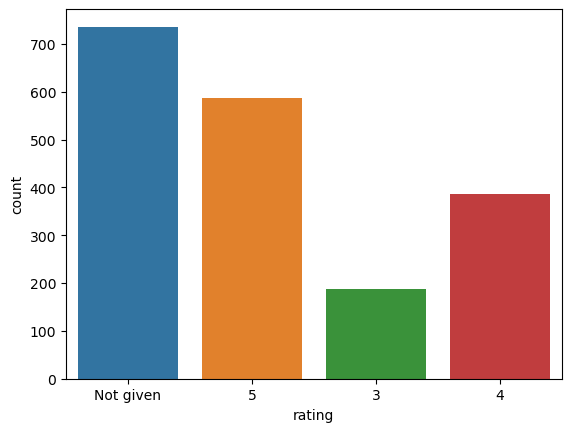

In [18]:
sns.countplot(data = df, x = 'rating'); ## Complete the code to plot bar graph for 'rating' column

#### Observation
From the above plot it is very clear that the number of those who did not give rate on the order is more than those who rated 3,4,5. 

#### Food Preparation time

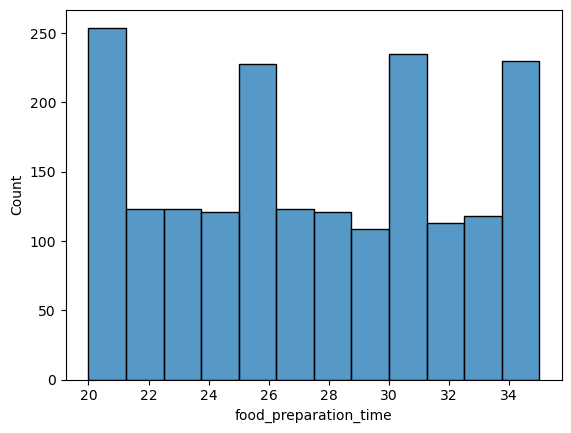

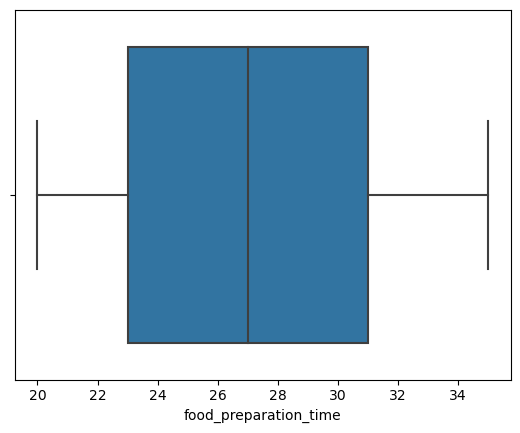

In [19]:
sns.histplot(data=df,x='food_preparation_time'); ## Complete the code to plot the histogram for the food preparation time
plt.show()
sns.boxplot(data=df,x='food_preparation_time'); ## Complete the code to plot the boxplot for the food preparation time
plt.show()

#### Observation
1- The distribution is relatively uniform and mean and median are very similor.

2- Each food preparation takes between 20 and 35 min

#### Delivery time

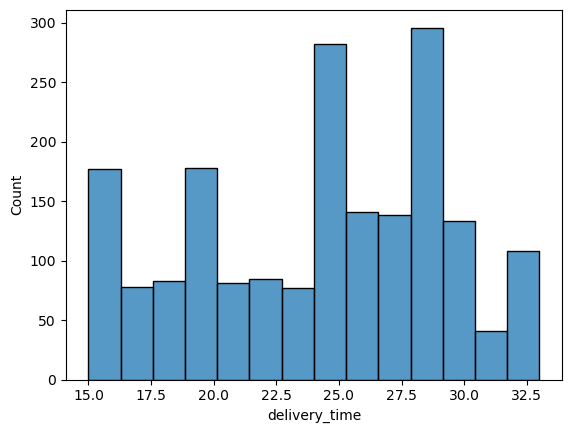

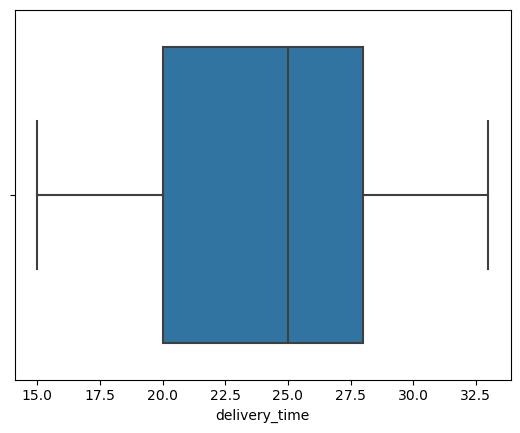

In [20]:
sns.histplot(data=df,x='delivery_time'); ## Complete the code to plot the histogram for the delivery time
plt.show()
sns.boxplot(data=df,x='delivery_time'); ## Complete the code to plot the boxplot for the delivery time
plt.show()

#### Observation
1- The distribution is not much skewed and mean and median are close.

2- Orders take between 15 and 33 min to be delivered.

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head()## Complete the code

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observation
From the above output the top 5 reataurants in terms of the number of orders received are 'Shake Shack ','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken' and 'Parm'.

### **Question 8:** Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observation
The most popular cuisine on weekends is American, with 415 number. 

### **Question 9:** What percentage of the orders cost more than 20 dollars? [2 marks]


In [23]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observation
The number of total orders that cost more than 20 dollars is 555 and the percentage of orders above 20 dollars is 29.24%.

### **Question 10:** What is the mean order delivery time? [1 mark]

In [24]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observation
The mean delivery time for this dataset is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observation
The top most frequent custoner id is '52832' and the number of orders is '13'.

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [9 marks]

#### Cuisine vs Cost of the order

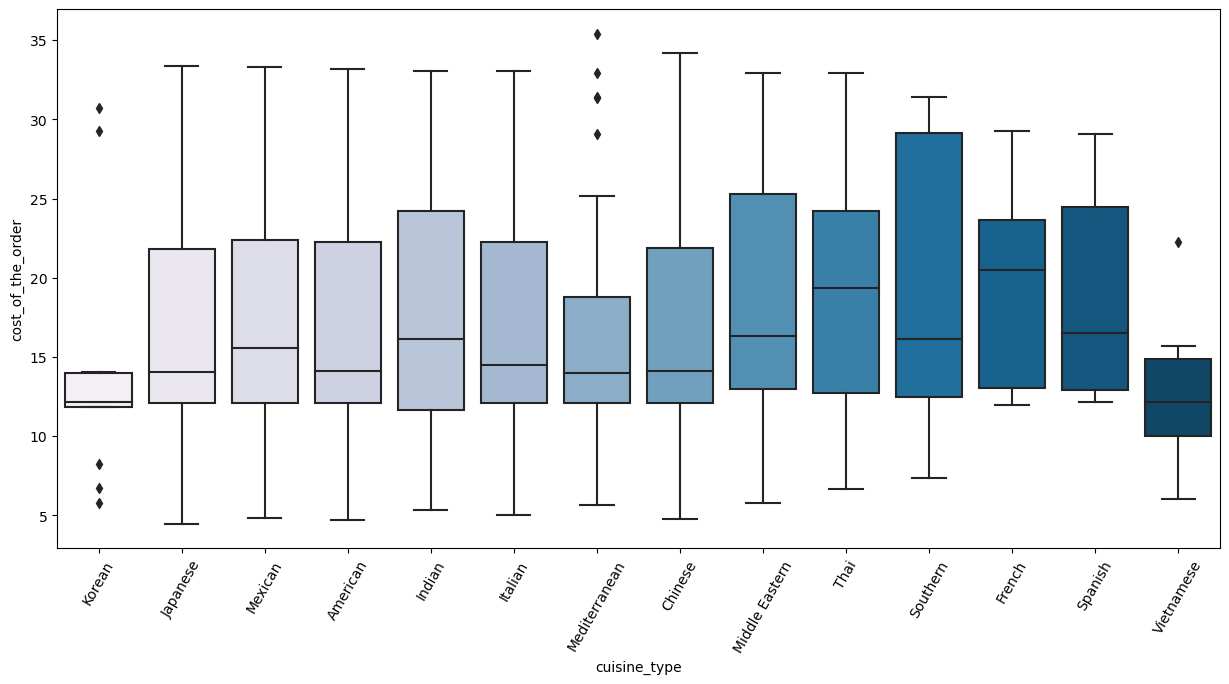

In [26]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observation
1- The highest mean costs belong to the orders for French, Middle Eastern, Spanish, and Thai cuisine types.

2- The lowest mean costs belong to the orders for Korean and Vietnamese cuisine types. The same cuisine types seem to have the smallest dispersion.

#### Cuisine vs Food Preparation time

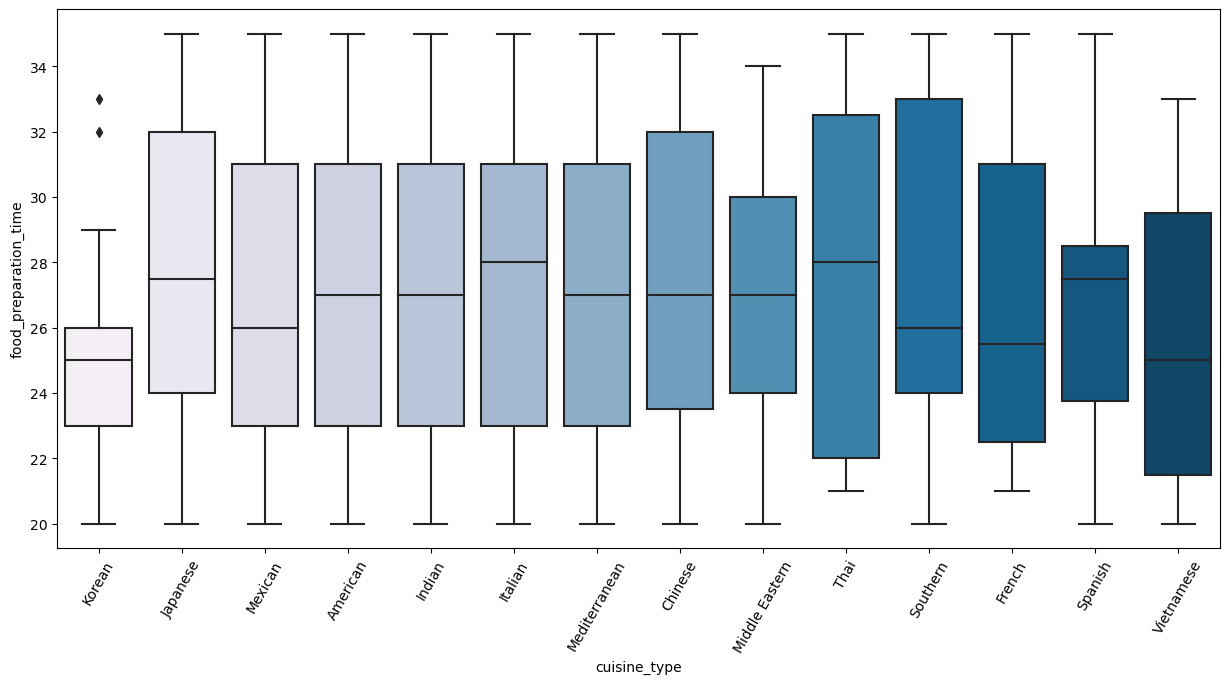

In [27]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu');  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Observation
1- The mean food preparation times are close, but the highest and lowest among them belong to the Southern and Korean cuisine types, respectively.

2- The minimum and maximum food preparation times are almost similar across cuisine types, except Korean, which has a relatively smaller maximum preparation time.


#### Day of the Week vs Delivery time

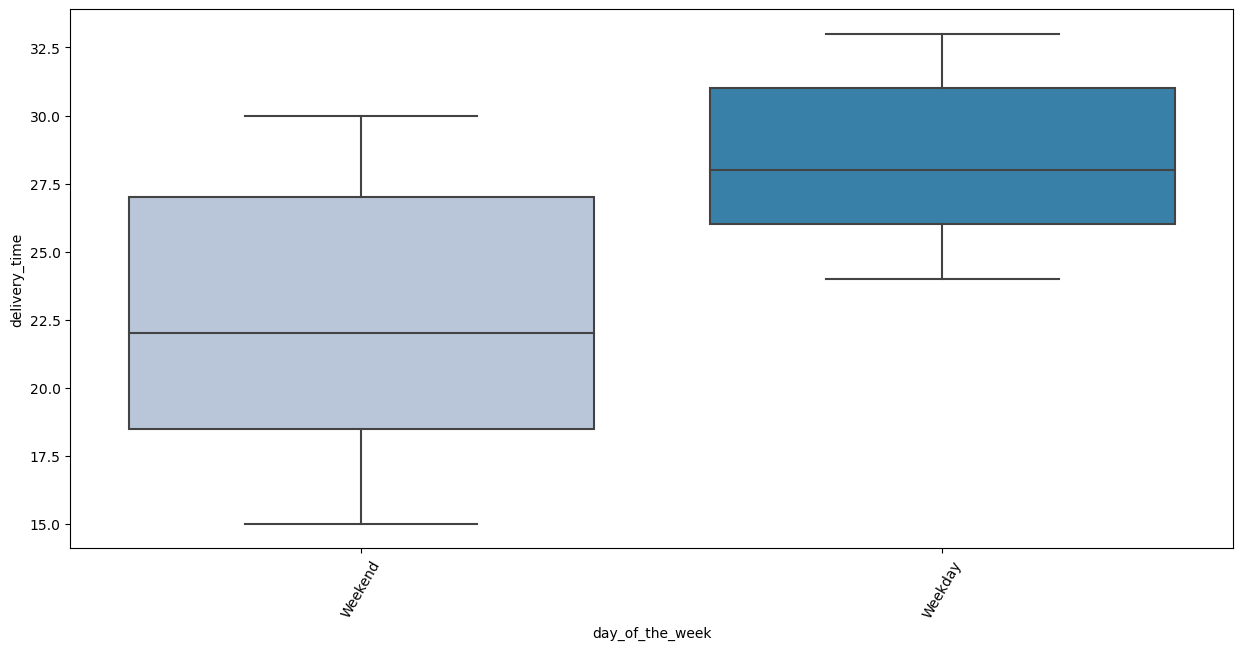

In [28]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu');## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [29]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

#### Observation
The restaurent name 'Shake Shack' is most revenue generated that is 3579.53 on the cost of the order.

#### Rating vs Delivery time

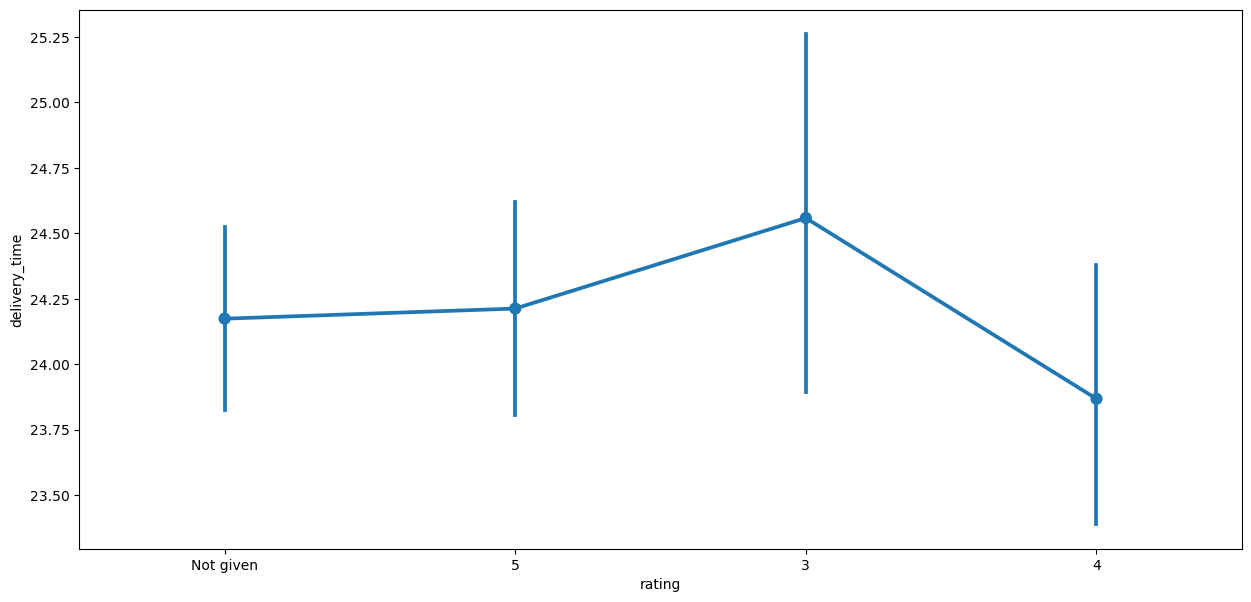

In [30]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df);
plt.show()

#### Rating vs Food preparation time

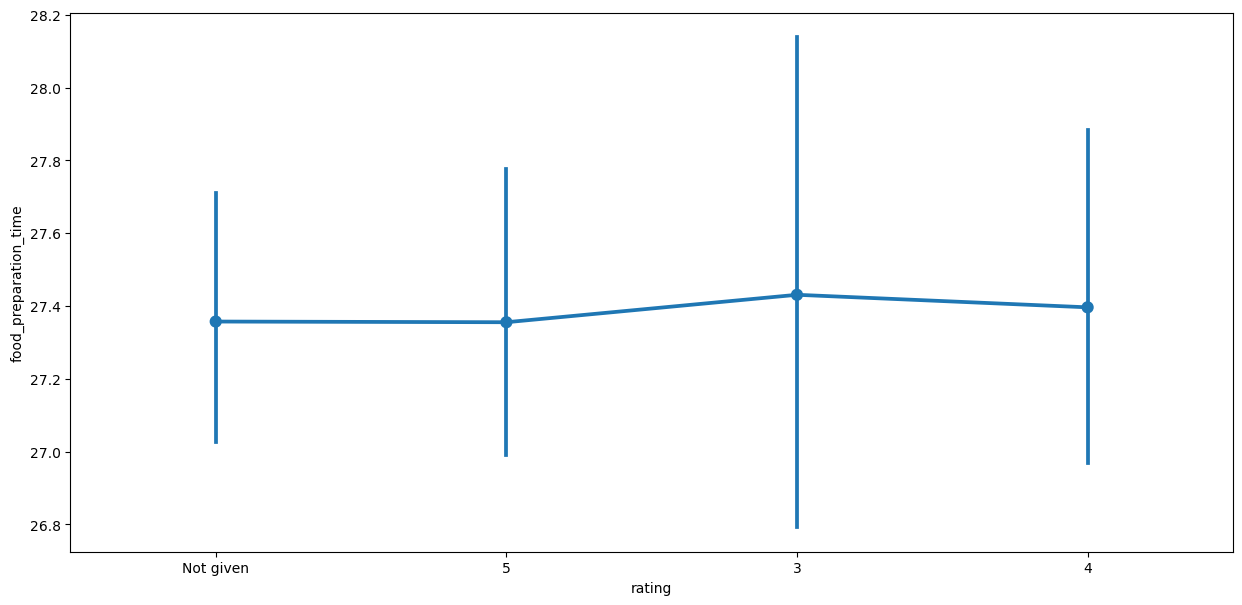

In [31]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df);
plt.show() ## Complete the code to visualize the relationship between rating and food preparation time using pointplot


#### Rating vs Cost of the order

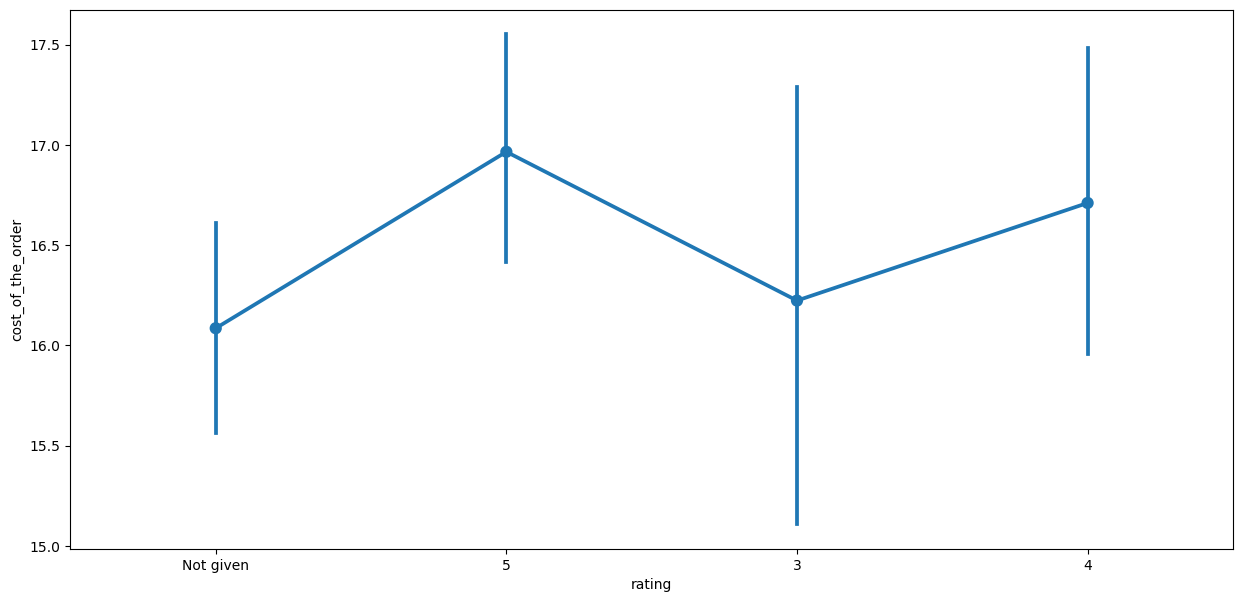

In [32]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df);
plt.show() ## Complete the code to visualize the relationship between rating and cost of the order using pointplot


#### Correlation among variables

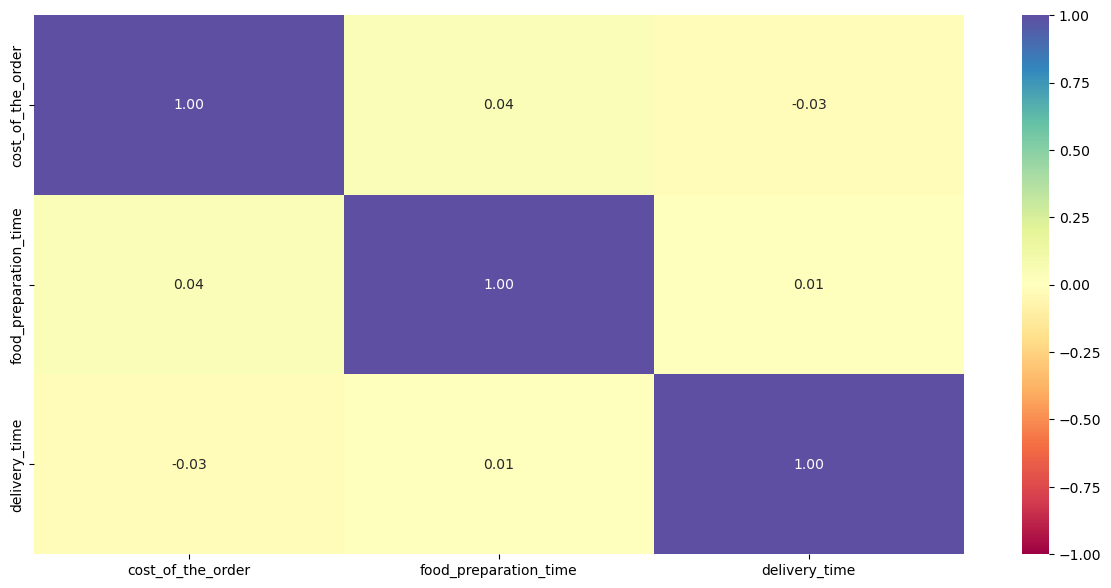

In [33]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation
From the above heatmap we see that there are no significant correlation between 'cost_of_the_order', 'food_preparation_time' and 'delivery_time'.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [34]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [35]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observation
The four restaurants fulfilled the specified criteria are 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', and 'The Meatball Shop'.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [36]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [37]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observation
The net revenue on the dataset is around 6166.3 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)[2 marks]


In [38]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df['total_time']

## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
tine_more_than_60 = df[df['total_time']>60]
print('The number of total time that have 60 min above is:',tine_more_than_60.shape[0])
percentage = (tine_more_than_60.shape[0] / df.shape[0]) * 100
print("Percentage of total time avobe 60min:", round(percentage, 2), '%')


The number of total time that have 60 min above is: 200
Percentage of total time avobe 60min: 10.54 %


#### Observation
The number of total time that have 60 min above is 200 and percentage of total time avobe 60min 10.54 %.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [39]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observation
The mean delivery time on weekdays is around 28 minutes and the mean delivery time on weekends is around 22 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* From the above analysis of the dataframe it is very clera that the food aggregator company need to change something.
rating is very low, there are four cuisine types have the most number of restaurent, there is no significant correlation found between some variables like order cost, food preparation time, delivery time, and customer rating.

There is some recomendations are provided bellow for the above analysis:

### Recommendations:

1- The number of orders which is not been rated is large number to the total number of orders (736 out of 1898). It is recommended to the company considers approaches to motivate its customers to rate their orders so more reliable conclusions could be made based on the ratings.

2- American, Japanese, Italian, and Chinese cuisine types are the top four cuisine types. These cuisine types have the most number of restaurants, too. That said, it appears that if the company adds to the number of restaurant choices in other cuisines, their number of orders/customers may increase, too.

3- No significant correlation was found between order cost, food preparation time, delivery time, and customer rating.

4- The highest 3-rated orders were for the Vietnamese cuisine, making it of the lowest average rating among all cuisine types. The company may need to find new and more valueable Vietnamese restaurants with better quality and add them to their restaurant options.

5- The majority of the orders are placed on the weekend and the number of unique customers ordering food on the weekend is almost double that during the weekdays. The company may come up with discounts to increase the number of orders and customers on the weekdays.
 

---